<h1>Walmart Demand Forecasting: Final Project 2</h1>

**Dataset Name**: Walmart Dataset

**Description**: This dataset provides historical sales data for 45 Walmart stores located in different regions. The dataset covers 2010-02-05 to 2012-11-01 and includes various economic factors and holiday information that might affect sales. Walmart seeks to improve sales and demand prediction accuracy using machine learning. Key challenges include modeling the impact of promotional markdown events preceding major holidays like the Super Bowl, Labor Day, Thanksgiving, and Christmas, which significantly influence sales. The dataset aims to enhance forecasting capabilities amidst fluctuating demand and economic conditions.

**Source**: The dataset is sourced from Kaggle [link](https://www.kaggle.com/datasets/yasserh/walmart-dataset/data)

**Objective**: The goal of this analysis is to understand the key factors that influence sales at Walmart stores and to develop a model that accurately predicts future sales. This model can help Walmart optimize inventory management, staffing, and marketing strategies.

## Explanation of Each Column:

| Column Name       | Description                                              | Data Type | Notes                               |
|-------------------|----------------------------------------------------------|-----------|-------------------------------------|
| Store             | Unique identifier for each store                         | Integer | Distinguishes sales data across different Walmart stores |
| Date              | Date of the sales data                                   | Object to be converted to datetime64[ns]  | Indicates the week of sales |
| Weekly_Sales      | Sales recorded for the given store for that week | Float | Target variable for the predictive model |
| Holiday_Flag         | Indicator for whether the week includes a major holiday  | Integer | Affects sales patterns 1=Holiday week 0=Non-hoiday week|
| Temperature       | Average temperature for the region during that week      | Float | Provides insights into how weather conditions impact sales |
| Fuel_Price        | Cost of fuel in the region for that week                 | Float | Can influence consumer spending behavior |
| CPI               | Consumer Price Index                                     | Float | Represents the relative cost of consumer goods and services, impacting purchasing power |
| Unemployment      | Unemployment rate in the region for that week            | Float | Higher unemployment rates might negatively affect sales |
| Year          | Year of the sales data                                   | Integer   | Extracted from the Date column after conversion |
| Month         | Month of the sales data                                  | Integer   | Extracted from the Date column after conversion |
| Day           | Day of the sales data                                    | Integer   | Extracted from the Date column after conversion |
| WeekOfYear    | ISO week date system: week number of the sales data                        | Integer   | Extracted from the Date column after conversion |

###Visual inspection of the data

In [60]:
import pandas as pd
import numpy as np

# Create a DataFrame
df = pd.read_csv('Walmart.csv')

print("First 5 rows of the DataFrame:")
print(df.head())

# Add blank lines for readability
print()
print()


# Information about DataFrame size
num_rows, num_columns = df.shape
print(f"The DataFrame has {num_rows} rows and {num_columns} columns.")

First 5 rows of the DataFrame:
   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  


The DataFrame has 6435 rows and 8 columns.


###Exploratory Data Analysis (EDA)

In [61]:
from datetime import datetime

# Dataframe Information
print("Dataframe Information:")
print(df.info())
print()

# Date is 2010-02-05 object-we need to convert it to datetime format in order to extract later
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y') # converts object(string) format to datetime format
df['Year'] = df.Date.dt.year
df['Month'] = df.Date.dt.month
df['Day'] = df.Date.dt.day
df['WeekOfYear'] = df['Date'].dt.isocalendar().week

# Dataframe Information check after date conversion
print("Dataframe Information with Date converted:")
print(df.info())

# Check for missing values
missing_values = df.isnull().sum().sum()  # Total number of missing values in the DataFrame
print()
if missing_values == 0:
    print("There are no missing values in the DataFrame.")
else:
    print(f"There are {missing_values} missing values in the DataFrame.")
print()

# Descriptive statistics
print("Descriptive Statistics:")
print(df.describe())
print()

import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

# Check for outliers - numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
# Using IQR method for each numerical column
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    if not outliers.empty:
        print(f"Column '{col}' has {len(outliers)} outliers according to IQR method.")
print()


Dataframe Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB
None

Dataframe Information with Date converted:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  64

#####**Descriptive Statistics summary:**
---
Store has a mean of 23 suggesting the dataset covers a range of stores with each contributing around the same on average. It is a distribution that indicates the sales data is fairly represented across the 45 stores that are included.

Outcome variable: Weekly_Sales has a mean ~1,046,965 dollars with a standard deviation of ~$564,366. The range is 209,986-3,818,686 suggesting a broad range of variability/weekly sales. The diversity here across the different weeks may be influenced by other factors.

Holiday_Flag shows a mean of ~7% of sales are conducted on a holiday with a low .255 standard deviation which implies it is consistent but somewhat of a minor impact on sales compared to the non-holiday weeks.

Temperature and Economic factors: The average temperature is ~ 60.66 degrees and may help in understanding seasonal variations in consumer behiavior and/or sales patterns. Fuel_Price has a mean of ~3.36, CPI is ~171.58, Unemployment ~8.

Date Components: Month, Day and WeekOfYear suggests the average peak sales are around mid June, the 25th week of the year.


#####**Outliers**
---

Column 'Weekly_Sales' has 34 outliers according to IQR method.<br>
Column 'Holiday_Flag' has 450 outliers according to IQR method.<br>
Column 'Temperature' has 3 outliers according to IQR method.<br>
Column 'Unemployment' has 481 outliers according to IQR method.<br>
We will look to reason and plot.


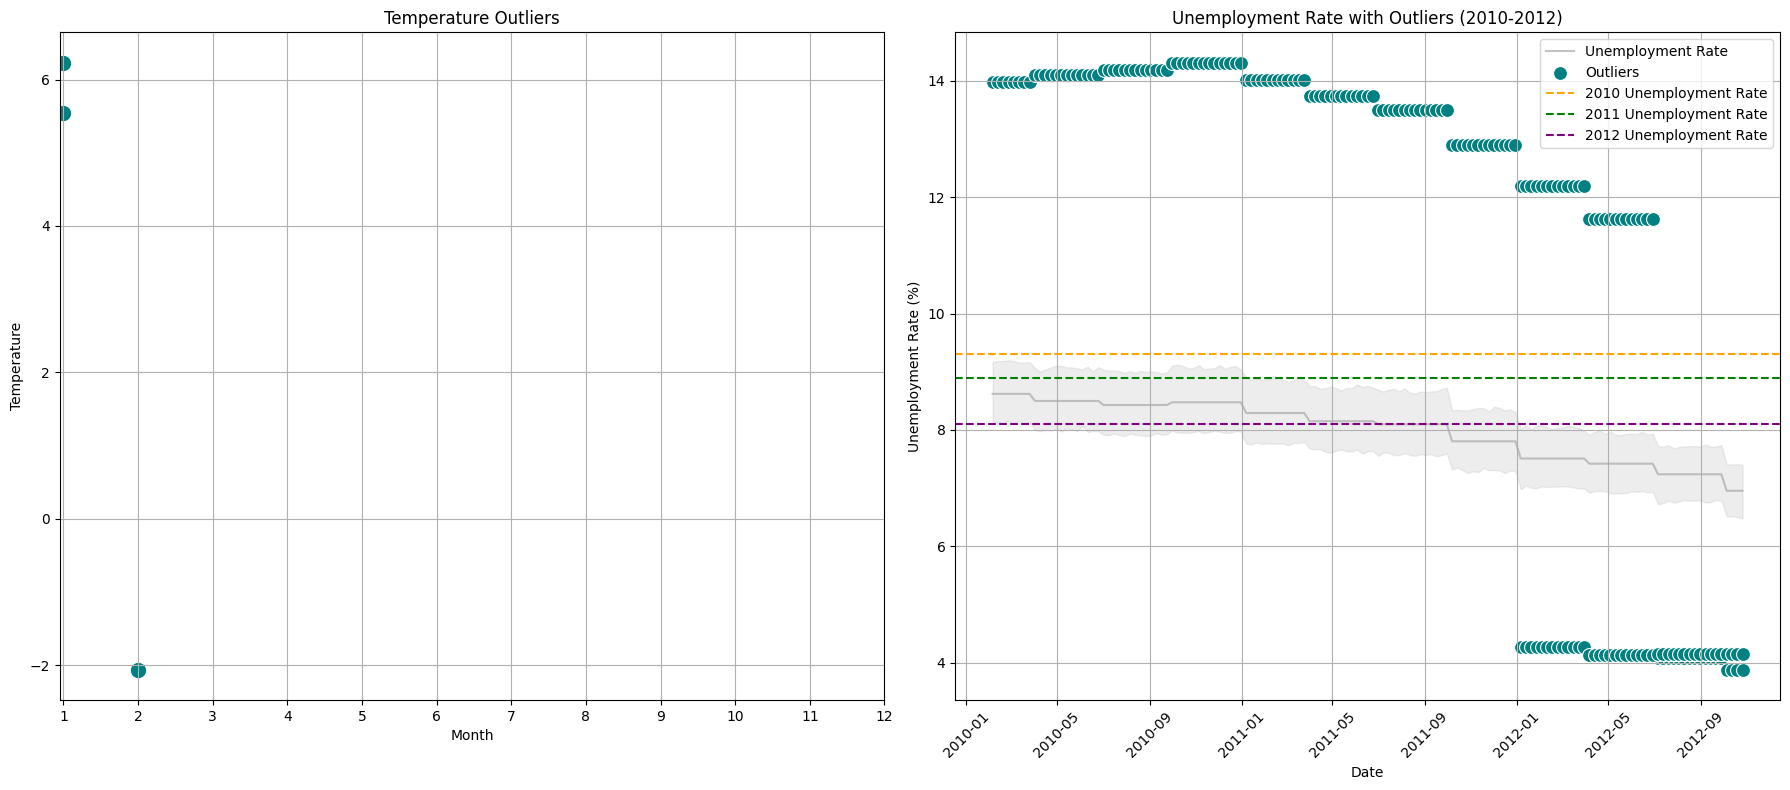

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter outliers in the Temperature column using IQR method
Q1_temp = df['Temperature'].quantile(0.25)
Q3_temp = df['Temperature'].quantile(0.75)
IQR_temp = Q3_temp - Q1_temp
lower_bound_temp = Q1_temp - 1.5 * IQR_temp
upper_bound_temp = Q3_temp + 1.5 * IQR_temp

temperature_outliers = df[(df['Temperature'] < lower_bound_temp) | (df['Temperature'] > upper_bound_temp)]

# Filter outliers in the Unemployment column using IQR method
Q1_unemployment = df['Unemployment'].quantile(0.25)
Q3_unemployment = df['Unemployment'].quantile(0.75)
IQR_unemployment = Q3_unemployment - Q1_unemployment
lower_bound_unemployment = Q1_unemployment - 1.5 * IQR_unemployment
upper_bound_unemployment = Q3_unemployment + 1.5 * IQR_unemployment

unemployment_outliers = df[(df['Unemployment'] < lower_bound_unemployment) | (df['Unemployment'] > upper_bound_unemployment)]

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Plotting the temperature outliers
ax1.scatter(temperature_outliers['Month'], temperature_outliers['Temperature'], color='#008080', marker='o', s=100)  # Teal color
ax1.set_xlabel('Month')
ax1.set_ylabel('Temperature')
ax1.set_title('Temperature Outliers')
ax1.grid(True)
ax1.set_xticks(range(1, 13))

# Plotting the unemployment outliers
sns.lineplot(data=df, x='Date', y='Unemployment', label='Unemployment Rate', color='#A9A9A9', alpha=0.7, ax=ax2)  # Grey color
sns.scatterplot(data=unemployment_outliers, x='Date', y='Unemployment', color='#008080', label='Outliers', s=100, ax=ax2)  # Pale lavender color

# Mark significant periods based on historical data
ax2.axhline(y=9.3, color='orange', linestyle='--', label='2010 Unemployment Rate')
ax2.axhline(y=8.9, color='green', linestyle='--', label='2011 Unemployment Rate')
ax2.axhline(y=8.1, color='purple', linestyle='--', label='2012 Unemployment Rate')

ax2.set_xlabel('Date')
ax2.set_ylabel('Unemployment Rate (%)')
ax2.set_title('Unemployment Rate with Outliers (2010-2012)')
ax2.legend()
ax2.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

plt.tight_layout()
plt.show()


#####**Outliers**
---

Column 'Temperature' has 3 outliers we will keep. It is reasonable that some months are colder year to year and these 3 outliers are showing up in January and February.

Column 'Unemployment' has 481 outliers. According to [statista.com](https://www.statista.com/statistics/193290/unemployment-rate-in-the-usa-since-1990/) there was high unemployment rate during the time of this dataset of:
2010 9.3%, 2011 8.9%, 2012 8.1%. Given that the period (2010-02-05 to 2012-11-01) includes years with high unemployment rates, a large number of outliers might reflect genuine economic conditions rather than errors. We will keep the outliers to preserve data integrity and complexity of the dataset as they may provide insights into unusual or significant economic events or trends needed for analysis.


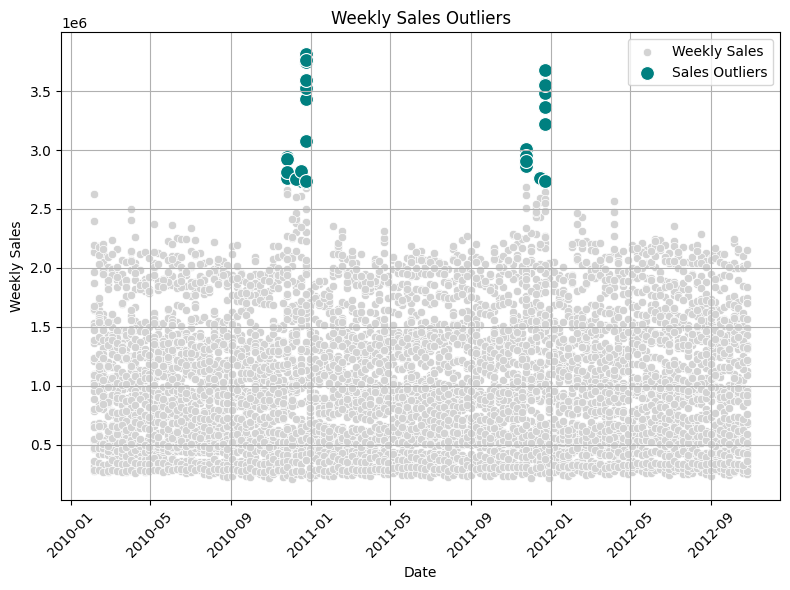

In [100]:
# 'Weekly_Sales' column
Q1 = df['Weekly_Sales'].quantile(0.25)
Q3 = df['Weekly_Sales'].quantile(0.75)
IQR = Q3 - Q1

# Defining the upper bound for outliers based on IQR
upper_bound_sales = Q3 + 1.5 * IQR

# Filtering outliers in weekly sales
sales_outliers = df[df['Weekly_Sales'] > upper_bound_sales]

# Plotting only the Weekly Sales outliers in teal
plt.figure(figsize=(8, 6))

# Plot all Weekly Sales data
sns.scatterplot(x='Date', y='Weekly_Sales', data=df, color='lightgray', label='Weekly Sales')

# Plotting outliers in teal
sns.scatterplot(x='Date', y='Weekly_Sales', data=sales_outliers, color='teal', label='Sales Outliers', s=100)

plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales Outliers')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

#####**Outliers**
---

Column 'Weekly_Sales' has 34 outliers that appear to be tied to the Christmas shopping season in December suggesting this is when sales spike and are to be expected. For this reason, we will keep the outliers.

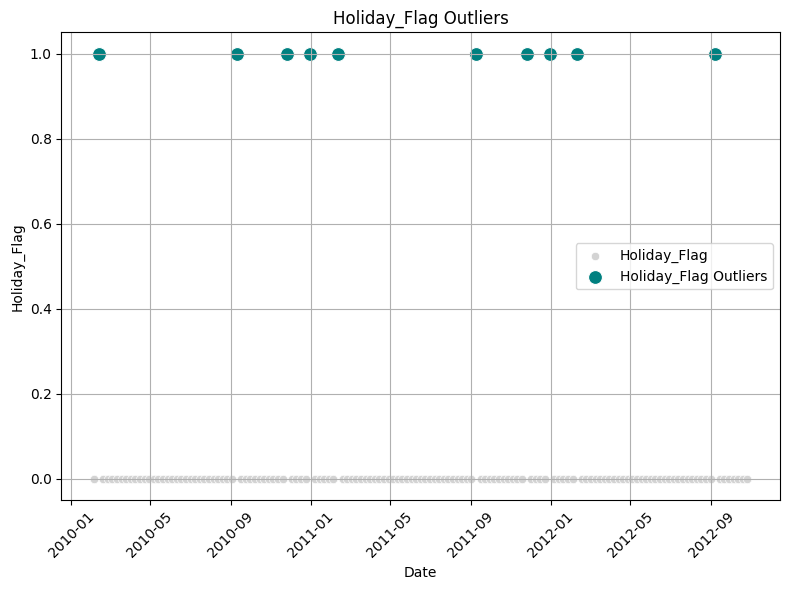

Number of outliers in Holiday_Flag: 450
Percentage of outliers in Holiday_Flag: 6.99%


In [99]:
# Calculate outliers based on IQR method for 'Holiday_Flag'
Q1 = df['Holiday_Flag'].quantile(0.25)
Q3 = df['Holiday_Flag'].quantile(0.75)
IQR = Q3 - Q1

# Define outliers for 'Holiday_Flag'
holiday_flag_outliers = df[(df['Holiday_Flag'] < (Q1 - 1.5 * IQR)) | (df['Holiday_Flag'] > (Q3 + 1.5 * IQR))]

# Plotting outliers in Holiday_Flag column
plt.figure(figsize=(8, 6))

# Plot all data points in light gray
sns.scatterplot(x='Date', y='Holiday_Flag', data=df, color='lightgray', label='Holiday_Flag')

# Plot outliers in teal
sns.scatterplot(x='Date', y='Holiday_Flag', data=holiday_flag_outliers, color='teal', label='Holiday_Flag Outliers', s=100)

plt.xlabel('Date')
plt.ylabel('Holiday_Flag')
plt.title('Holiday_Flag Outliers')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Print statistical summary and insights
print("Number of outliers in Holiday_Flag:", len(holiday_flag_outliers))
percentage_outliers = len(holiday_flag_outliers) / len(df) * 100
print("Percentage of outliers in Holiday_Flag: {:.2f}%".format(percentage_outliers))

#####**Outliers**
---


Column 'Holiday_Flag' has 450 outliers. The 6.99% of outliers in Holiday_Flag indicates a small proportion to the total dataset. This suggests they may represent specific events or conditions and will be kept at this time.

STOP HERE AND PICKUP TOMORROW
#####**Correlation Summaries at this point:**
---

smoking and sex: There is a moderate correlation (0.4459).<br>
DEATH_EVENT and time: There is a moderate correlation (-0.5270).

#####**Variance:**
---

High variance: creatinine_phosphokinase at (9.414586e+05) suggesting significant variability in enzyme levels among patients. platelets at (9.565669e+09) suggesting significant variability in platelet counts among patients.

Moderate variance: age, ejection_fraction (1.414865e+02 and 1.400635e+02, respectively) suggest some degree of variability.  serum_creatinine and serum_sodium (1.070211e+00 and 1.946996e+01, respectively) with this variability in the markers possibly indicating differences in kidney function (serum creatinine) and electrolyte balance (serum sodium) among patients.

Low variance: anaemia, diabetes, high_blood_pressure, sex, smoking, DEATH_EVENT at ~ 0.2 indicating they are mostly concentrated in one or a few categories across the dataset. Eg. anaemia, diabetes, high blood pressure, sex, and smoking are binary variables, so their variance may reflect the proportion of patients with each condition or characteristic. Time 6.023965e+03 is higher when compared to categorical variables but lower when compared to continuous variables like creatinine_phosphokinase and platelets. This may indicate some variability in follow-up times among the patients.